# Matplotlib

    - http://matplotlib.org
    - http://seaborn.pydata.org

### 기본 그래프 

    막대 그래프(bar), 선 그래프(line), 산포도(scatter), 상자(box), 히스토그램
    
    1) 정적데이터
        - 요약방법 : 도표
        - 정리방법 : 도수분포표, 분할표
        - 그래프 : 막대그래프 , 원그래프
    
    2) 양적 데이터 
        - 요약 방법 : 수치
        - 정리방법 : 산술 평균, 중앙값...
        - 그래프 : 히스토그램, Boxplot, 시계열 그래프, 산포도(산점도)
    

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib.font_manager as fm 
font_name = fm.FontProperties(fname="C:\\Windows\\Fonts\\malgun.ttf").get_name()
plt.rc("font",family=font_name)
mpl.rcParams["axes.unicode_minus"] = False

### 선그래프

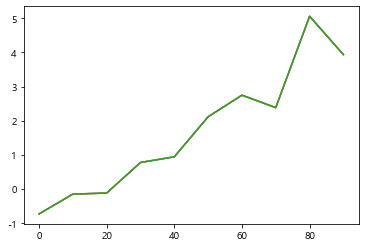

In [2]:
s = pd.Series(np.random.randn(10).cumsum(),index=np.arange(0,100,10))
#기본그래프 : 선그래프
s.plot()  # index =  x좌표 
s.plot.line() 
s.plot(kind="line")

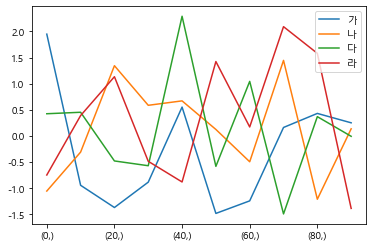

In [3]:
df1 =pd.DataFrame(np.random.randn(10,4),columns=['가','나','다','라'],
                 index=[np.arange(0,100,10)])
df1.plot.line()

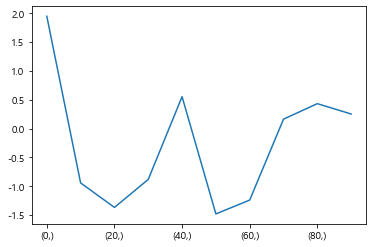

In [4]:
df1["가"].plot()

### 막대 그래프  

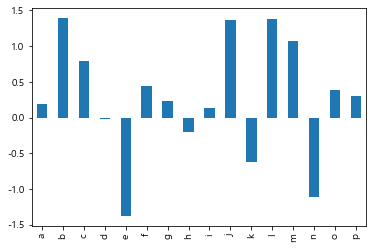

In [5]:
s2 = pd.Series(np.random.randn(16),index=list('abcdefghijklmnop'))
s2.plot(kind="bar")
s2.plot.bar()

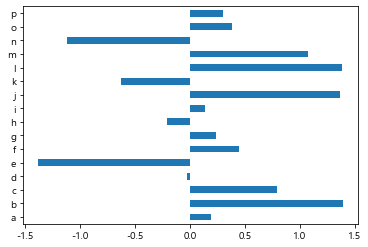

In [6]:
s2.plot(kind="barh") # 수평막대
s2.plot.barh()

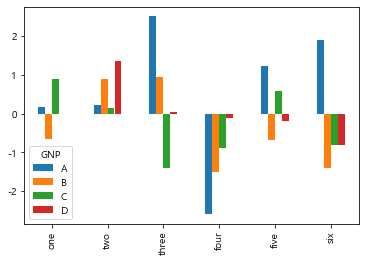

In [7]:
df2 = pd.DataFrame(np.random.randn(6,4),
index=['one','two','three','four','five','six'],
columns=pd.Index(['A','B','C','D'],name='GNP'))
df2.plot.bar()

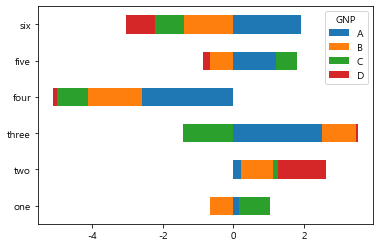

In [8]:
df2.plot(kind="barh",stacked=True)

### 히스토 그램 

           X변수가 가질 수 있는 값의 범위
           값만 필요하고 인덱스는 필요없다.

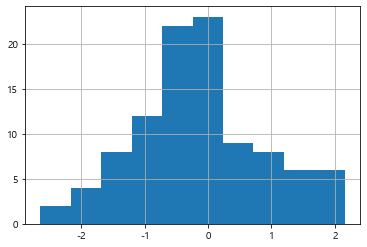

In [9]:
s3 = pd.Series(np.random.normal(0,1,size=100))
s3.hist()                     # 연속적인 데이터를 표시할때 /y값만 필요할때 /기본 막대 개수 : 10개 

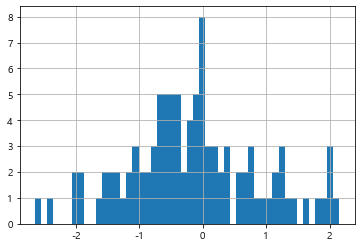

In [10]:
# bins : 막대 개수 조절
s3.hist(bins=50)

### 산포도(산점도, Scatter)
    
        - 두 변수의 관계(양, 음)
        - 이변령 그래프

[[ 3.13792911 -1.88286777]
 [ 0.92564182  3.4602866 ]
 [ 0.1482783  -2.35563847]
 [ 0.67699648 -0.24798372]
 [-0.62703413  3.94499003]]


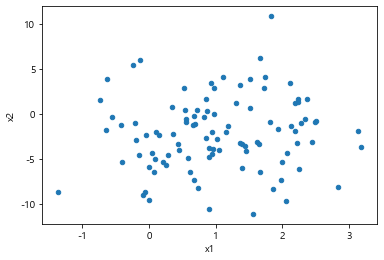

In [11]:
x1 = np.random.normal(1,1,size=(100,1))
x2 = np.random.normal(-2,4,size=(100,1))

x = np.concatenate((x1,x2),axis=1)           #변수를 합할 때 쓰는 함수 
print(x[:5])

df3 = pd.DataFrame(x, columns=['x1','x2'])
df3.head()

df3.plot.scatter("x1","x2")

### Box plot

        연속형 변수와 이산형 변수를 함께 그리는 그래프
        다변령 그래프   

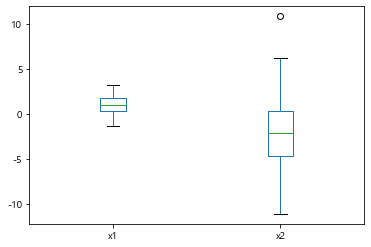

In [12]:
df3.plot.box()            # 기본적으로 4분위 수/ 범위를 벗어나면 이상치/ median 가운데 선  

## 좀 더 정교한 그래프 

In [13]:
tips= sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


Text(0, 0.5, 'Total Bill')

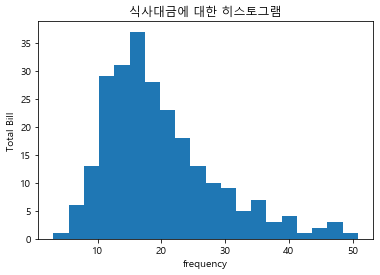

In [14]:
fig = plt.figure()
ax =fig.add_subplot(1,1,1)

#total_bill에 금액 분포를 확인
ax.hist(tips['total_bill'],bins=20)
ax.set_title("식사대금에 대한 히스토그램")
ax.set_xlabel("frequency")
ax.set_ylabel("Total Bill")

Text(0, 0.5, 'Tip')

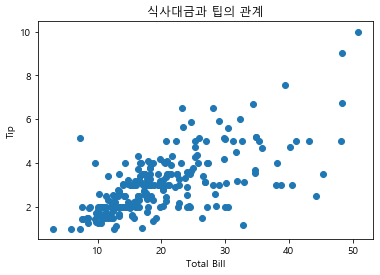

In [15]:
# tip 과 totalbill의 관계를 알고싶다.            두변수의 관계는 산포도
fig=plt.figure()
ax = fig.add_subplot(1,1,1)

ax.scatter(tips['total_bill'],tips['tip'])
ax.set_title("식사대금과 팁의 관계")
ax.set_xlabel("Total Bill")
ax.set_ylabel("Tip")

Text(0, 0.5, 'Tip')

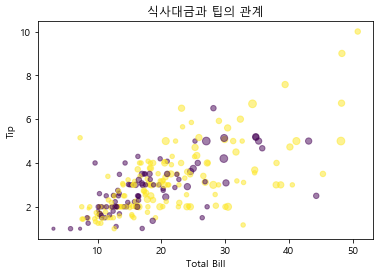

In [16]:
def record_sex(sex):
    if sex == "Female":
        return 0
    else:
        return 1 
    
tips['sex_color']=tips['sex'].apply(record_sex)
tips.head()

fig=plt.figure()
ax = fig.add_subplot(1,1,1)
# c = 색갈, s = size, alpha = 투명도
ax.scatter(tips['total_bill'],tips['tip'], c =tips["sex_color"], 
           s = tips['size']*10, alpha = 0.5)       
ax.set_title("식사대금과 팁의 관계")
ax.set_xlabel("Total Bill")
ax.set_ylabel("Tip")

Text(0.5, 1.0, '성별에 따른 팁의 관계')

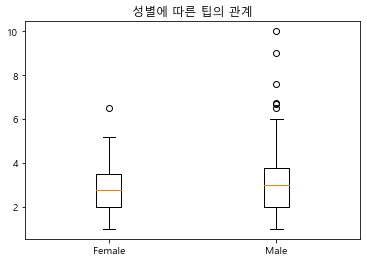

In [17]:
# 성별과 팁의 관계


fig=plt.figure()
ax = fig.add_subplot(1,1,1)

ax.boxplot([tips[tips["sex"]=="Female"]["tip"],
            tips[tips["sex"]=="Male"]["tip"]],labels=["Female","Male"])

ax.set_title("성별에 따른 팁의 관계")

###  seaborn

In [36]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Text(0, 0.5, 'Tip')

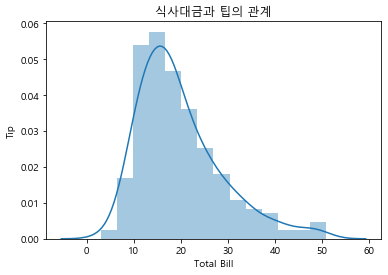

In [19]:
ax = plt.subplot()

#total_bill에 금액 분포를 확인

ax = sns.distplot(tips["total_bill"])
ax.set_title("식사대금과 팁의 관계")    
ax.set_xlabel("Total Bill")
ax.set_ylabel("Tip")

Text(0, 0.5, 'Tip')

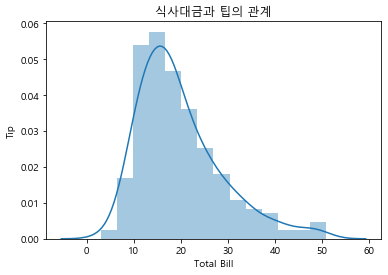

In [20]:
ax = plt.subplot()

#total_bill에 금액 분포를 확인

ax = sns.distplot(tips["total_bill"],hist=True,kde=True)
ax.set_title("식사대금과 팁의 관계")
ax.set_xlabel("Total Bill")
ax.set_ylabel("Tip")

Text(0, 0.5, 'Tip')

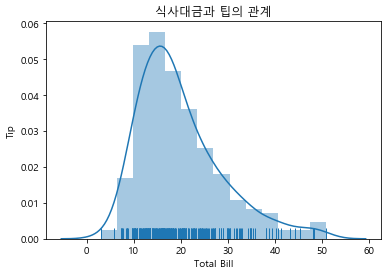

In [21]:
ax = plt.subplot()

#total_bill에 금액 분포를 확인

ax = sns.distplot(tips["total_bill"],rug=True)
ax.set_title("식사대금과 팁의 관계")
ax.set_xlabel("Total Bill")
ax.set_ylabel("Tip")

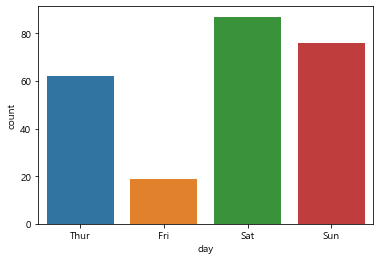

In [22]:
# 요일별로 팁의 빈도수 확인

sns.countplot("day",data=tips)

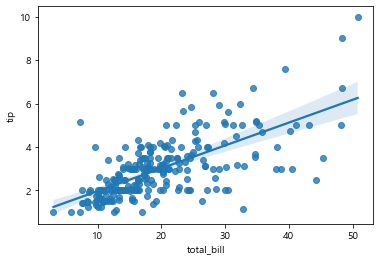

In [23]:
# tip 과 totalbill의 관계를 알고싶다.  
sns.regplot(x="total_bill",y ="tip",data=tips)              #회기선,산포도 동시

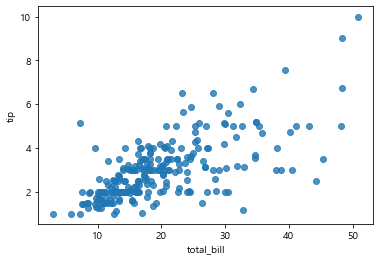

In [24]:
sns.regplot(x="total_bill",y ="tip",data=tips, fit_reg=False)      

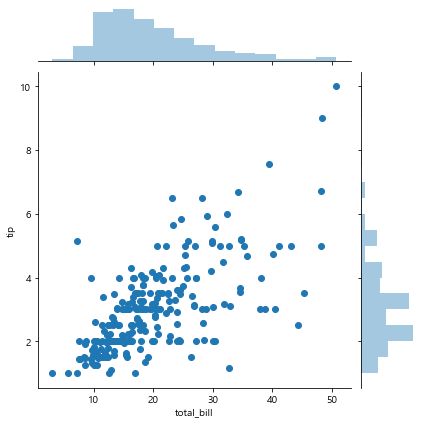

In [25]:
sns.jointplot(x="total_bill",y ="tip",data=tips)        # 히스토그램 + 산포도

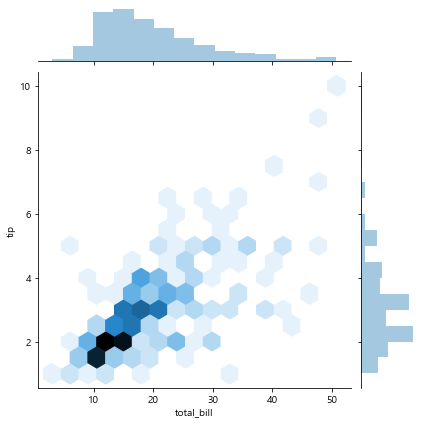

In [26]:
sns.jointplot(x="total_bill",y ="tip",data=tips,kind="hex")

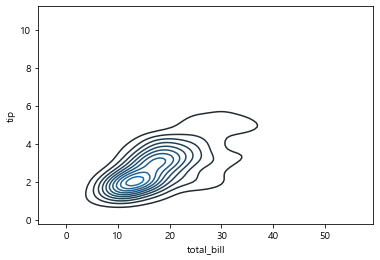

In [27]:
sns.kdeplot(data=tips["total_bill"],data2=tips['tip'])

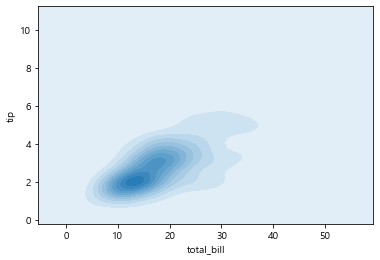

In [28]:
sns.kdeplot(data=tips["total_bill"],data2=tips['tip'],shade =True)

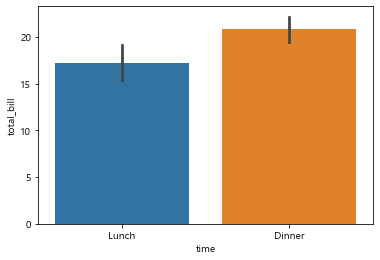

In [29]:
sns.barplot(x="time",y="total_bill",data=tips)

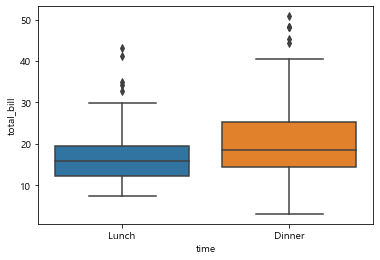

In [30]:
sns.boxplot(x="time",y="total_bill",data=tips)

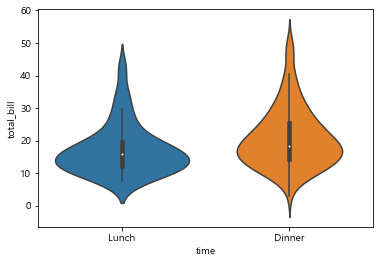

In [31]:
sns.violinplot(x="time",y="total_bill",data=tips)

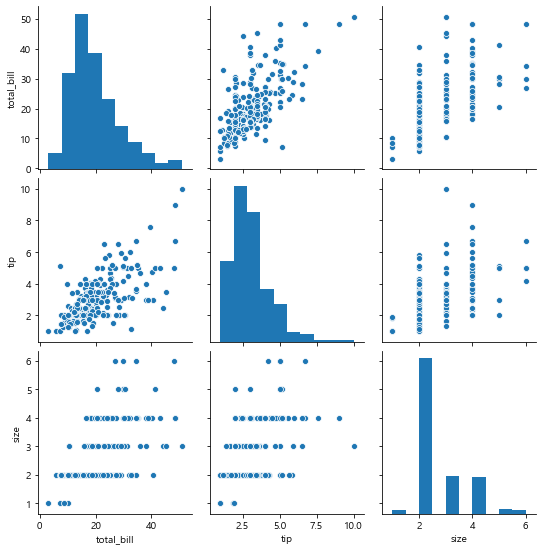

In [32]:
sns.pairplot(tips)


#더많은 양의 변수를 상관관계로 보여주는 그래프

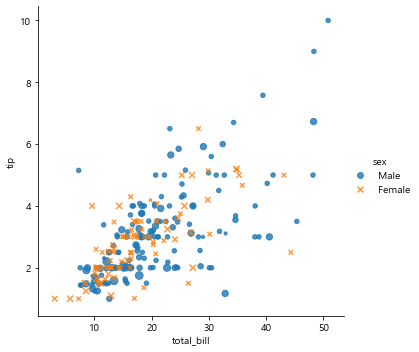

In [33]:
# 성별로 전체 식사대금과 팁의 관걩를 확인 # hue : 색상별로 
sns.lmplot(x="total_bill",y="tip",data=tips, fit_reg= False, hue = "sex",
          scatter_kws={"s" : tips["size"]*10},markers=["o","x"])

### 지도 시각화 

        pip install folium

In [34]:
import folium

ModuleNotFoundError: No module named 'folium'

In [ ]:
#folium,Map(location=[위도,경도])
map_ = folium.Map(location = [37.547144, 127.045406])
map_ = folium.Map(location = [37.547144, 127.045406],zoom_start = 15)
#map_ = folium.Map(location = [37.547144, 127.045406],zoom_start = 15,
#                 tiles="Stamen Toner")
map_

In [ ]:
state_unemp = pd.read_csv("data/map/folium_US_Unemployment_Oct2012.csv")
state_unemp.head()

In [ ]:
map = folium.Map(location=[40,-98],zoom_start=4)

state_geo = "data/map/folium_us-states.json"
map.choropleth(geo_data=state_geo, data=state_unemp, key_on="feature.id",
              columns=["State","Unemployment"],fill_color="YlGn")
map

In [ ]:
map_ = folium.Map(location = [37.547144, 127.045406],zoom_start = 15)

folium.Marker(location = [37.547144, 127.045406],popup="seoul forest",
              icon=folium.Icon(color="red",icon = "star")).add_to(map_)
folium.CircleMarker(location = [37.547144, 127.045406],popup="seoul forest",
                   radius=50,color = "#ffffgg",fill_color="#ffffgg").add_to(map_)
map_

### WordCloud

        - pip install wordcloud

In [ ]:
from wordcloud import WordCloud, STOPWORDS

In [ ]:
text = open("data/word/constitution.txt")
text = text.read()
text[:100]

In [ ]:
wc = WordCloud().generate(text)
wc = WordCloud(max_font_size=40,background_color="white").generate(text)
dir(wc)
wc.words_

plt.figure(figsize=(12,12))
plt.imshow(wc,interpolation="bilinear")
plt.axis("off") #축눈금 X

In [ ]:
from PIL import Image
alice_mask = np.array(Image.open("data/word/alice_mask.png"))
alice_mask

plt.imshow(alice_mask)

In [ ]:
text = open("data/word/alice.txt").read()
text[:210]

In [ ]:
stop = set(STOPWORDS)      # 무의미한 단어들 모음 
stop.add("said")           # 중복이 안되게 set으로 묶어서 추가 

wc = WordCloud(mask=alice_mask, stopwords=stop,background_color="black").generate(text)
plt.figure(figsize=(12,12))
plt.imshow(wc,interpolation="bilinear")
plt.axis("off")

### konlpy

       - http://konlpy.org
       - https://konlpy-ko.readthedocs.io/ko/v0.4.3/
       - https://konlpy-ko.readthedocs.io/ko/v0.4.3/install/
       - https://www.lfd.uci.edu/~gohlke/pythonlibs/#jpype
       - JPype1‑0.7.5‑cp37‑cp37m‑win_amd64.whl 설치
       - pip install konlpy

In [ ]:
#from konlpy.tag import Twitter
from konlpy.tag import Okt
from konlpy.corpus import kolaw # 샘플 
import nltk

In [ ]:
ko_text = kolaw.open("constitution.txt").read()
ko_text[:200]

stop_words = ["제","월","일","조","수","때","그","이","바","및","안","정","위","관"]

t = Okt()
#t.nouns('아버지가방에들어가신다')
ko_token = t.nouns(ko_text)
len(ko_token)

ko_token = [each_word for each_word in ko_token if each_word not in stop_words]
len(ko_token)

ko = nltk.Text(ko_token)
ko.vocab()
data = ko.vocab().most_common(500)

wc = WordCloud(mask=alice_mask, font_path="C:\\Windows\\Fonts\\malgun.ttf",
               stopwords=stop, background_color="black").generate_from_frequencies(dict(data))
plt.figure(figsize=(12,12))
plt.imshow(wc,interpolation="bilinear")
plt.axis("off")